In [140]:
#Basic Packages
import pandas as pd
import numpy as np
from pandas import datetime
import datetime as dt

#Visualization Package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

###  1)Read the data as an appropriate Time Series data and plot the data.

In [4]:
df=pd.read_csv('file:///C:/Users/RIKKI/Desktop/Notes/Datasets%20for%20Python//Sparkling.csv',squeeze=True,parse_dates=True)

In [5]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [75]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [6]:
df.shape

(187, 2)

In [7]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [76]:
df.duplicated().sum()

11

In [8]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [9]:
#df['Date']=pd.DatetimeIndex(start='1980-01',end='1995-08',freq='M')

In [10]:
df['Date']=pd.date_range(start='1980-01',end='1995-08',freq='M')

In [11]:
df.head()

,YearMonth,Sparkling,Date
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [12]:
df.drop(['YearMonth'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
Sparkling    187 non-null int64
Date         187 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [14]:
df.set_index('Date',inplace=True)

In [15]:
df.head()

,Sparkling
Date,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Text(0, 0.5, 'Sparkling')

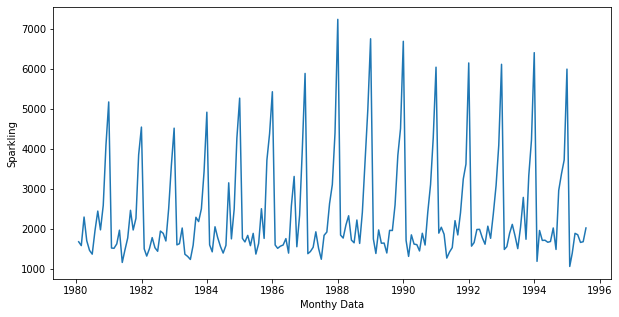

In [78]:
plt.figure(figsize=(10,5))
plt.plot(df)
plt.xlabel('Monthy Data')
plt.ylabel('Sparkling')
#Data looks to have a constant seasonality and uniform trend.

### 2)Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

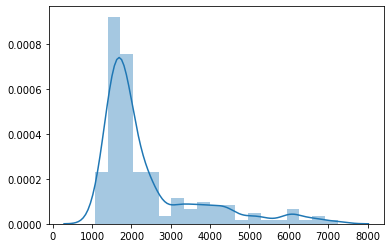

In [19]:
sns.distplot(df)
#Data is skewed

Text(0.5, 0, 'Year')

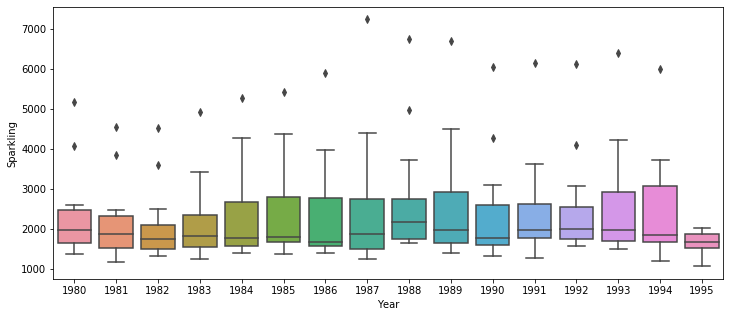

In [81]:
#Outliers are present when looking at corresponding year wise data
plt.figure(figsize=(12,5))
sns.boxplot(df.index.year,df['Sparkling'])
plt.xlabel('Year')

Text(0.5, 0, 'Year')

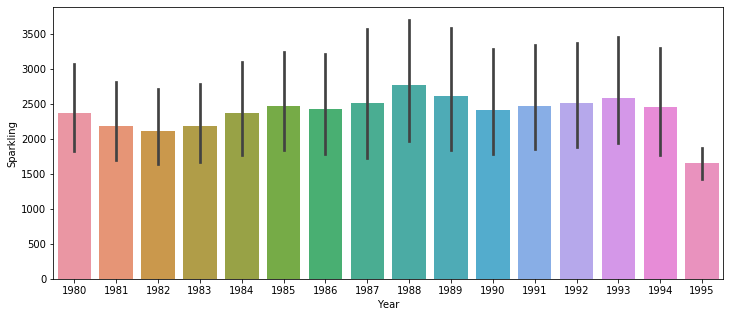

In [82]:
#Data seems to have more or less same sales across the year. 1988 has recorded maximum sales .
plt.figure(figsize=(12,5))
sns.barplot(df.index.year,df['Sparkling'])
plt.xlabel('Year')

Text(0.5, 0, 'Months')

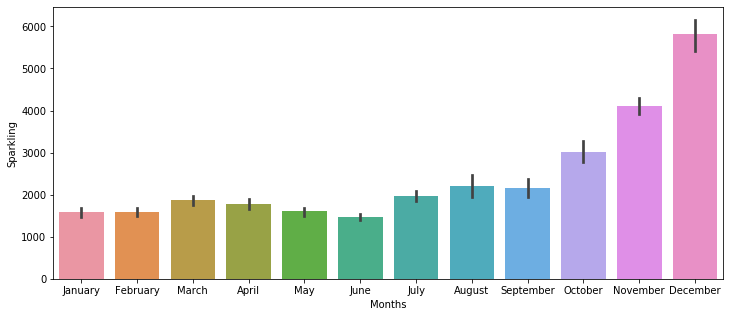

In [83]:
#December have greatest amount of sales across all the months followed be November and Oct. 
# Greater in sales may be due to the celebration in year end
plt.figure(figsize=(12,5))
sns.barplot(df.index.month_name(),df['Sparkling'])
plt.xlabel('Months')

Text(0.5, 0, 'Months')

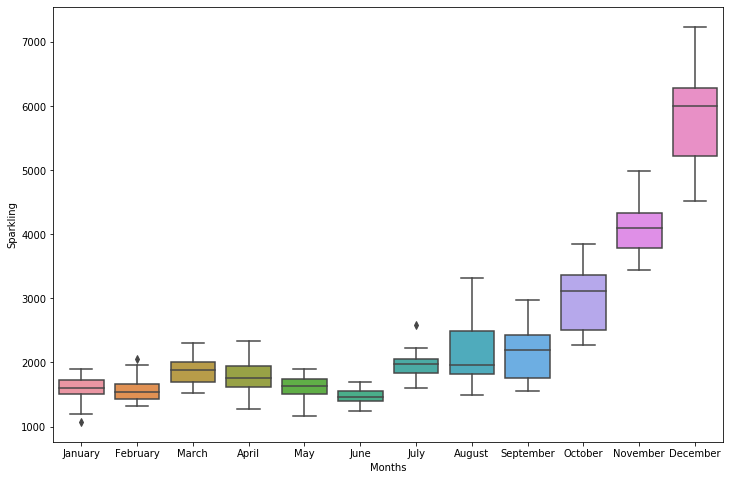

In [85]:
#Box plot is also showing us that December has recorded most number of sales
plt.figure(figsize=(12,8))
sns.boxplot(df.index.month_name(),df['Sparkling'])
plt.xlabel('Months')

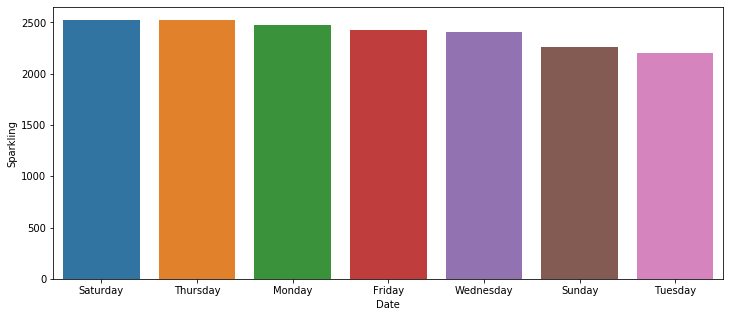

In [86]:
#Saturday registers highest average sales of beer throughout the whole week.
Tot_mean=df.groupby(df.index.day_name()).mean().reset_index()
Tot_mean=Tot_mean.sort_values(by='Sparkling',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_mean['Date'],Tot_mean['Sparkling'])

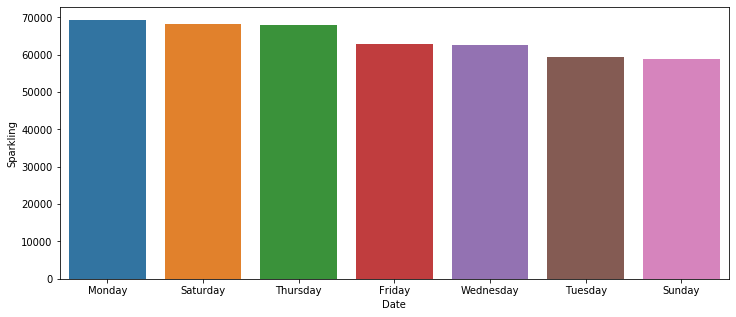

In [87]:
#Monday has the highest sales overall
Tot_sum=df.groupby(df.index.day_name()).sum().reset_index()
Tot_sum=Tot_sum.sort_values(by='Sparkling',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_sum['Date'],Tot_sum['Sparkling'])

In [89]:
#Creating PIVOT table.
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


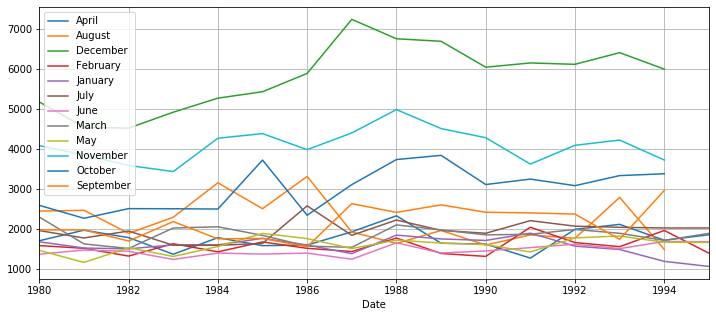

In [90]:
#Dec registers the highest amount of sales
monthly_sales_across_years.plot(figsize=(12,5))
plt.grid()
plt.legend(loc='best');

### Decompostion

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
#As the seasonal variation is more or less constant hence we will going to choose additive model.
decompose_addition=seasonal_decompose(df,model='additive',extrapolate_trend='freq')

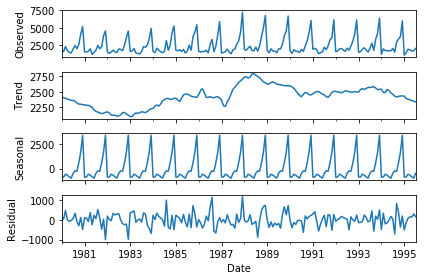

<Figure size 1008x720 with 0 Axes>

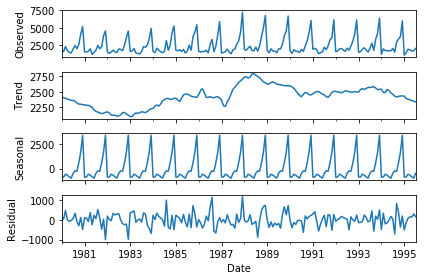

In [21]:
plt.figure(figsize=(14,10))
decompose_addition.plot()

In [22]:
trend_add = decompose_addition.trend
seasonality_add = decompose_addition.seasonal
residual_add = decompose_addition.resid

print('Trend','\n',trend_add.head(5),'\n')
print('Seasonality','\n',seasonality_add.head(5),'\n')
print('Residual','\n',residual_add.head(5),'\n')

Trend 
               Sparkling
Date                   
1980-01-31  2417.116647
1980-02-29  2406.350767
1980-03-31  2395.584887
1980-04-30  2384.819007
1980-05-31  2374.053127 

Seasonality 
              Sparkling
Date                  
1980-01-31 -852.939513
1980-02-29 -845.687698
1980-03-31 -560.602944
1980-04-30 -656.317669
1980-05-31 -827.225103 

Residual 
              Sparkling
Date                  
1980-01-31  121.822865
1980-02-29   30.336930
1980-03-31  469.018056
1980-04-30  -16.501338
1980-05-31  -75.828025 



In [23]:
#Creating decomposition using multiplicative model
decompose_multi=seasonal_decompose(df,model='multiplicative',extrapolate_trend='freq')

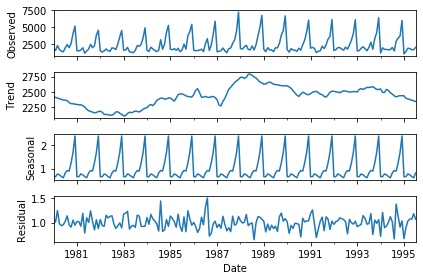

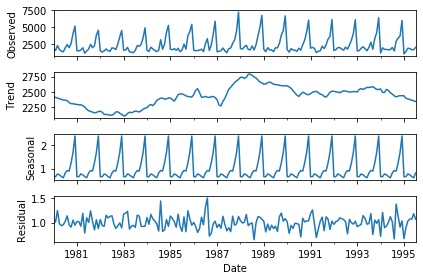

In [24]:
decompose_multi.plot()

In [23]:
trend_mul = decompose_multi.trend
seasonality_mul = decompose_multi.seasonal
residual_mul = decompose_multi.resid

print('Trend','\n',trend_mul.head(5),'\n')
print('Seasonality','\n',seasonality_mul.head(5),'\n')
print('Residual','\n',residual_mul.head(5),'\n')

Trend 
               Sparkling
Date                   
1980-01-31  2417.116647
1980-02-29  2406.350767
1980-03-31  2395.584887
1980-04-30  2384.819007
1980-05-31  2374.053127 

Seasonality 
             Sparkling
Date                 
1980-01-31   0.651394
1980-02-29   0.653344
1980-03-31   0.770983
1980-04-30   0.731422
1980-05-31   0.659550 

Residual 
             Sparkling
Date                 
1980-01-31   1.070819
1980-02-29   1.011975
1980-03-31   1.247458
1980-04-30   0.981478
1980-05-31   0.939452 



### 3. Split the data into training and test. The test data should start in 1991.

### Train-Test Split

In [27]:
train=df.loc['1980-01-31':'1990-12-31']
test=df.loc['1991-01-31':]

In [30]:
train.tail()

,Sparkling
Date,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [31]:
test.head()

,Sparkling
Date,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


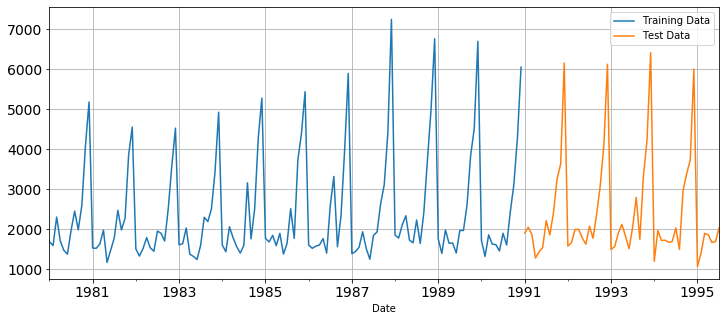

In [91]:
#Plotting Training - Testing Data
train['Sparkling'].plot(figsize=(12,5), fontsize=14)
test['Sparkling'].plot(figsize=(12,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. - Please do try to build as many models as possible and as many iterations of models as possible with different parameters.

### Model Building

### Model 1: Linear Regression

In [32]:
#Importing LinearRegression Module from sklearn
from sklearn.linear_model import LinearRegression

In [33]:
train_time= [ i+1 for i in range(len(train))]

In [34]:
test_time = [i+133 for i in range(len(test))]

In [36]:
print("The train time are ",train_time)
print("")
print("The test time are ",test_time)

The train time are  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]

The test time are  [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [37]:
train_reg=train.copy()
test_reg=test.copy()
train_reg['train_time']=train_time
test_reg['test_time']=test_time

In [38]:
print(train_reg.head())
print(test_reg.head())

            Sparkling  train_time
Date                             
1980-01-31       1686           1
1980-02-29       1591           2
1980-03-31       2304           3
1980-04-30       1712           4
1980-05-31       1471           5
            Sparkling  test_time
Date                            
1991-01-31       1902        133
1991-02-28       2049        134
1991-03-31       1874        135
1991-04-30       1279        136
1991-05-31       1432        137


In [39]:
lr=LinearRegression()

In [40]:
#Fitting Regression model on training dataset
lr=lr.fit(train_reg[['train_time']],train_reg['Sparkling'])

In [41]:
train_predictions_model1 = lr.predict(train_reg[['train_time']])
train_reg['RegOnTime'] = train_predictions_model1
train_reg.head()

,Sparkling,train_time,RegOnTime
Date,,,
1980-01-31,1686,1,2021.741171
1980-02-29,1591,2,2027.573830
1980-03-31,2304,3,2033.406488
1980-04-30,1712,4,2039.239147
1980-05-31,1471,5,2045.071805


In [42]:
test_predictions_model1 = lr.predict(test_reg[['test_time']])
test_reg['RegOnTime'] = test_predictions_model1
test_reg.head()

,Sparkling,test_time,RegOnTime
Date,,,
1991-01-31,1902,133,2791.652093
1991-02-28,2049,134,2797.484752
1991-03-31,1874,135,2803.317410
1991-04-30,1279,136,2809.150069
1991-05-31,1432,137,2814.982727


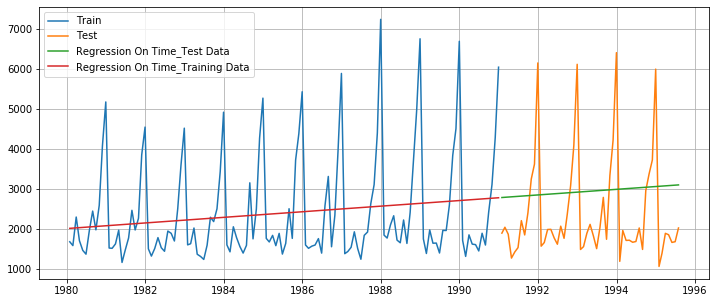

In [92]:
#Plotting Training,Testing and values obtained from regression model.
plt.figure(figsize=(12,5))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test_reg['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(train_reg['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

##### Defining the functions for calculating the accuracy metrics.

In [44]:
from sklearn import metrics

In [46]:
# Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

##### Model Evaluation of Linear Regression Model

In [48]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 and MAPE is 40.05


In [49]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 and MAPE is 50.15


In [50]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15


### Model 2: Naive Approach:   $\hat{y}_{t+1} = y_t$

In [93]:
#In this model the last value of the training dataset is taken as the predicted values
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [94]:
## Let us get the last value (or the most recent value) of the training set.
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Date
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [95]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Date
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

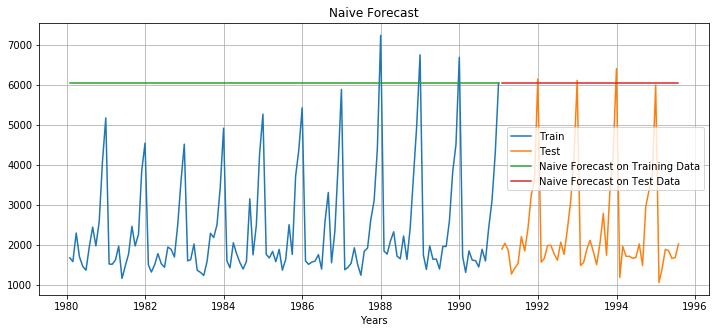

In [99]:
plt.figure(figsize=(12,5))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

##### Model Evaluation of Naive Bayes Model

In [65]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 and MAPE is 153.17


In [66]:
## Test Data - RMSE and MAPE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 and MAPE is 152.87


In [67]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87


### Method 3: Simple Average

In [68]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [69]:
## Let us get the pedicted values as the mean values of the training set.
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

,Sparkling,mean_forecast
Date,,
1980-01-31,1686,2403.780303
1980-02-29,1591,2403.780303
1980-03-31,2304,2403.780303
1980-04-30,1712,2403.780303
1980-05-31,1471,2403.780303


In [70]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Date,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


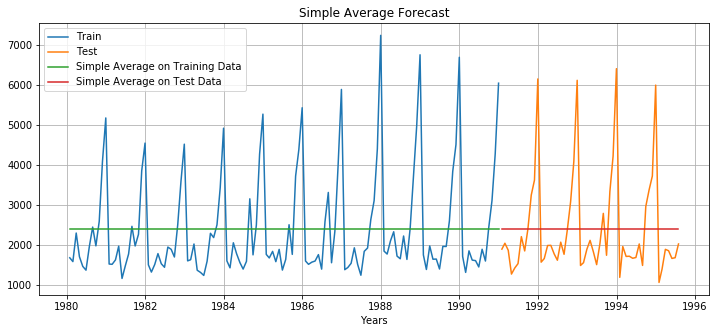

In [101]:
plt.figure(figsize=(12,5))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

##### Model Evaluation of Simple Average

In [72]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 and MAPE is 40.36


In [73]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 and MAPE is 38.90


In [70]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90


### Method 4: Moving Average(MA)

In [103]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Date,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [104]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


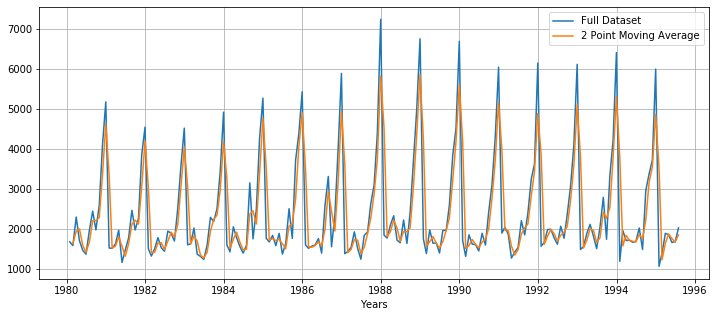

In [107]:
## Plotting on the whole data
plt.figure(figsize=(12,5))
plt.plot(MovingAverage['Sparkling'], label='Full Dataset')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.grid();

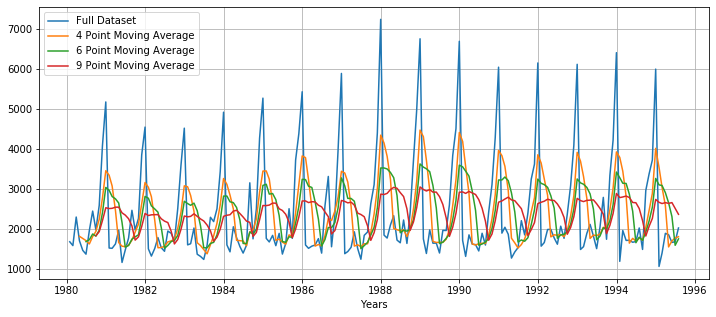

In [108]:
plt.figure(figsize=(12,5))
plt.plot(MovingAverage['Sparkling'], label='Full Dataset')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.grid();

In [111]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

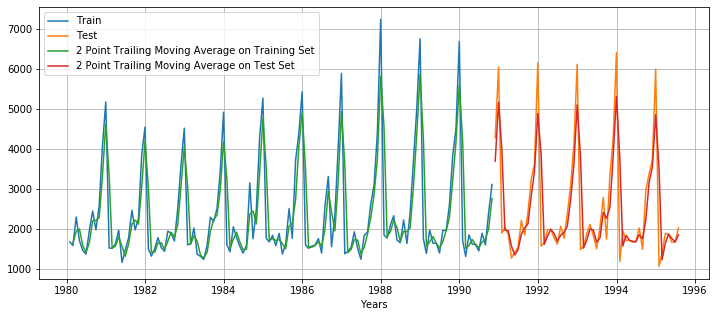

In [115]:
## Plotting on both the Training and Test data
plt.figure(figsize=(12,5))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

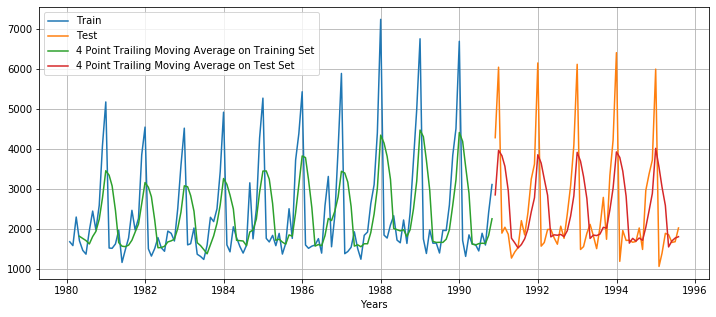

In [116]:
plt.figure(figsize=(12,5))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

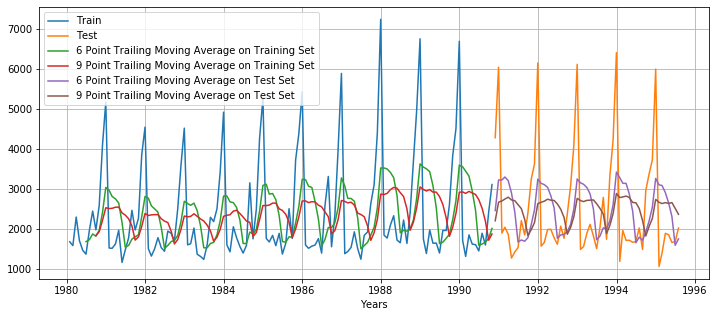

In [117]:
plt.figure(figsize=(12,5))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

In [79]:
trailing_MovingAverage_test.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1990-11-30,4286,3701.0,2857.75,2464.500000,2209.888889
1990-12-31,6047,5166.5,3968.25,3229.500000,2675.222222
1991-01-31,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-28,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-31,1874,1961.5,2968.00,3212.333333,2800.222222


In [80]:
trailing_MovingAverage_test.shape

(57, 5)

In [81]:
test.head()

,Sparkling
Date,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


In [82]:
test.shape

(55, 1)

##### Model Evaluation on moving average

In [119]:
from sklearn.metrics import mean_squared_error

In [121]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'][2:],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'][2:])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))## Test Data - RMSE and MAPE --> 4 point Trailing MA

## Test Data - RMSE and MAPE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'][2:],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'][2:])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'][2:],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'][2:])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'][2:],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'][2:])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 813.401 and MAPE is 19.70
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 1156.590 and MAPE is 35.96
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 1283.927 and MAPE is 43.86
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 1346.278 and MAPE is 46.86


In [87]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86


### Method 5: Simple Exponential Smoothing

In [156]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [157]:
SES_train = train.copy()
SES_test = test.copy()

In [158]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'].astype('double')).fit()

In [159]:
model_SES.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [160]:
#pred = ets.ExponentialSmoothing(series, trend = None, damped = False, seasonal = None).fit()
print('')
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Smoothing Level', np.round(model_SES.params['smoothing_level'], 4))
print('Initial Level', np.round(model_SES.params['initial_level'], 4))
print('')
y_pred = model_SES.forecast(steps = 3)
y_pred = pd.DataFrame(y_pred)
y_pred


== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Smoothing Level 0.0
Initial Level 2403.7856



,0
1991-01-31,2403.785622
1991-02-28,2403.785622
1991-03-31,2403.785622


In [161]:
y_pred1=model_SES.predict(start=SES_train['Sparkling'].index[0])

In [162]:
test_forecast=model_SES.forecast(steps=len(SES_test['Sparkling']))

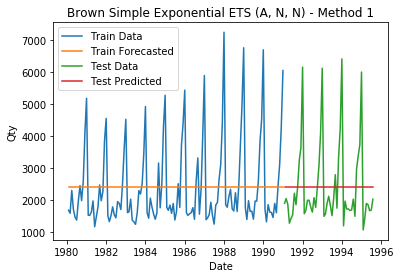

In [163]:
fig1, ax = plt.subplots()
ax.plot(SES_train['Sparkling'], label = 'Train Data')
ax.plot(y_pred1, label = 'Train Forecasted')
ax.plot(SES_test['Sparkling'],label='Test Data')
ax.plot(test_forecast,label='Test Predicted')
plt.legend(loc = 'upper left')
plt.title('Brown Simple Exponential ETS (A, N, N) - Method 1')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.show()

In [165]:
## Training Data

rmse_model5_train_1 = mean_squared_error(SES_train['Sparkling'],y_pred1,squared=False)
mape_model5_train_1 = MAPE(SES_train['Sparkling'],y_pred1)
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1298.484 and MAPE is 40.36


In [166]:
## Test Data

rmse_model5_test_1 = mean_squared_error(SES_test['Sparkling'],test_forecast,squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],test_forecast)
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1275.082 and MAPE is 38.90


In [167]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=0,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
"Alpha=0,SimpleExponentialSmoothing",1275.081823,38.90


### Method 6: Double Exponential Smoothing (Holt's Model)

In [168]:
from statsmodels.tsa.api import ExponentialSmoothing,Holt

In [169]:
DES_train = train.copy()
DES_test = test.copy()

In [175]:
model_DES_new = Holt(DES_train['Sparkling'].astype("double")).fit()

In [176]:
model_DES_new.params

{'smoothing_level': 0.6478112025162996,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0826224342366,
 'initial_slope': 27.064245197810123,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [177]:
model_DES_new.forecast(steps=len(DES_test)).shape

(55,)

In [178]:
SES_train['Sparkling'].shape

(132,)

In [179]:
print("Train RMSE is ->",mean_squared_error(DES_train['Sparkling'],model_DES_new.fittedvalues,squared=False))
print("Train MAPE is ->",MAPE(DES_train['Sparkling'],model_DES_new.fittedvalues))

Train RMSE is -> 1337.4842695303805
Train MAPE is -> 39.11


In [180]:
print("Test RMSE is ->",mean_squared_error(DES_test['Sparkling'],model_DES_new.forecast(steps=len(DES_test)),squared=False))
print("Test MAPE is ->",MAPE(DES_test['Sparkling'],model_DES_new.forecast(steps=len(DES_test))))

Test RMSE is -> 3851.171500445094
Test MAPE is -> 152.07


In [181]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [109]:
for i in np.arange(0.3,1,0.01):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test['Sparkling']))
        
        rmse_model6_train = mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test }, ignore_index=True)

In [110]:
resultsDf_7.sort_values(by='Test RMSE').head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.30,0.3,1592.292788,18259.110704
8,0.31,0.3,1592.224935,18944.091980
16,0.32,0.3,1591.509550,19603.743874
24,0.33,0.3,1590.199864,20236.588167
32,0.34,0.3,1588.352808,20841.593670


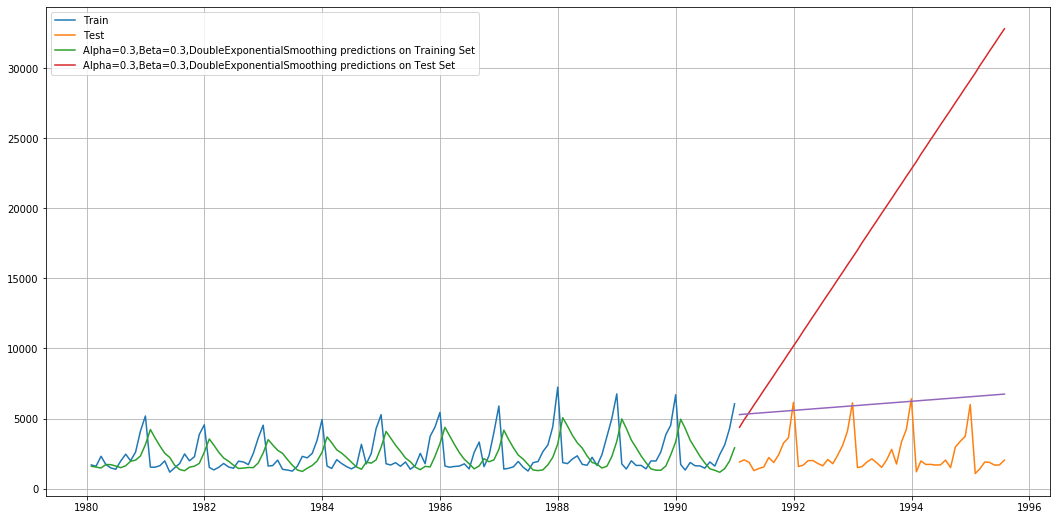

In [111]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(model_DES_new.forecast(steps=len(DES_test)))


plt.legend(loc='best')
plt.grid();

##### Model Evaluation of Double Exponential Smoothing

In [112]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': mean_squared_error(DES_test['Sparkling'],model_DES_new.forecast(steps=len(DES_test)),squared=False),
                              'Test MAPE':MAPE(DES_test['Sparkling'],model_DES_new.forecast(steps=len(DES_test)))}
                           ,index=['Alpha=0.647,Beta=0,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",1275.081823,38.90
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",3851.171500,152.07


### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

###### Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [113]:
TES_train = train.copy()
TES_test = test.copy()

In [114]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'].astype("double"),trend='additive',seasonal='additive',freq='M')

In [115]:
model_TES_autofit = model_TES.fit()

In [116]:
model_TES_autofit.params

{'smoothing_level': 0.08622052864340005,
 'smoothing_slope': 1.7097923242790787e-09,
 'smoothing_seasonal': 0.476348411283582,
 'damping_slope': nan,
 'initial_level': 1685.0330927463103,
 'initial_slope': 3.268126463343508e-09,
 'initial_seasons': array([  38.53100271,  -37.57689912,  464.75420339,  205.89223136,
        -140.66189258, -156.89672956,  338.19195606,  856.38589201,
         402.98286327,  971.15758553, 2401.41729185, 3426.30639716]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [117]:
## Prediction on the training data
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Sparkling,auto_predict
Date,,
1980-01-31,1686,1723.564095
1980-02-29,1591,1644.217397
1980-03-31,2304,2141.960068
1980-04-30,1712,1897.069264
1980-05-31,1471,1534.558371


In [118]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test['Sparkling']))
TES_test.head()

,Sparkling,auto_predict
Date,,
1991-01-31,1902,1532.368807
1991-02-28,2049,1241.329822
1991-03-31,1874,1726.719960
1991-04-30,1279,1584.260962
1991-05-31,1432,1493.955208


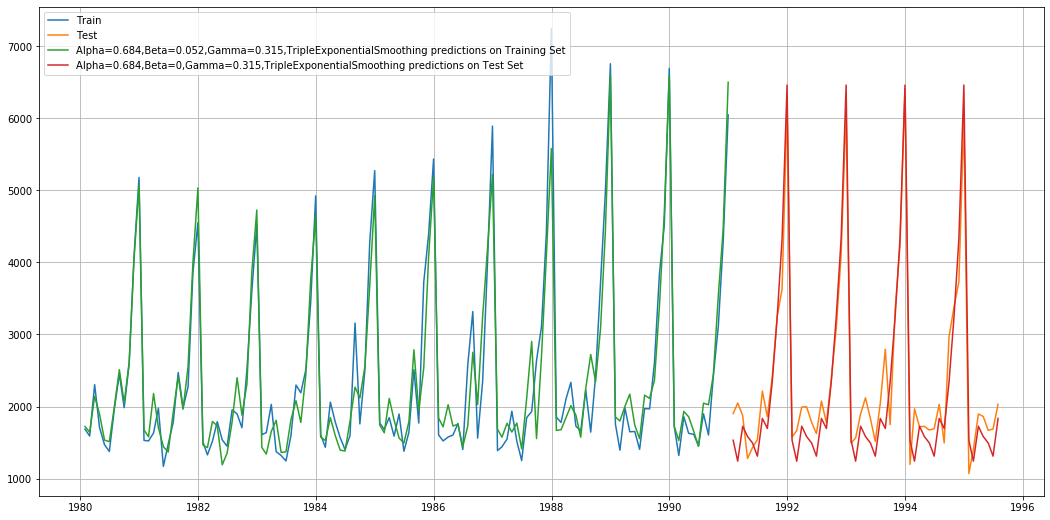

In [119]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_train['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.684,Beta=0,Gamma=0.315,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [120]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.08622052864340005,Beta: 0 and Gamma:0.476348411283582, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.08622052864340005,Beta: 0 and Gamma:0.476348411283582, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 371.264 MAPE is 10.90


In [121]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.08622052864340005,Beta: 0 and Gamma:0.476348411283582,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.08622052864340005,Beta: 0 and Gamma:0.476348411283582,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 362.792 MAPE is 12.08


In [122]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",1275.081823,38.90
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",3851.171500,152.07
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",362.791906,12.08


##### With iterations

In [123]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [124]:
for i in np.arange(0.03,1.1,0.1):
    for j in np.arange(0.03,1.1,0.1):
        for k in np.arange(0.03,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test['Sparkling']))
        
            rmse_model8_train = mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [125]:
resultsDf_8_2.head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.03,0.03,0.03,487.046972,14.84,566.212453,19.01
1,0.03,0.03,0.13,450.718917,13.51,405.509929,12.73
2,0.03,0.03,0.23,426.249806,12.70,329.788722,9.98
3,0.03,0.03,0.33,410.406536,12.17,317.553880,9.59
4,0.03,0.03,0.43,401.069283,11.84,335.769813,10.78


In [126]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
3,0.03,0.03,0.33,410.406536,12.17,317.553880,9.59
122,0.13,0.03,0.13,416.264660,12.60,325.256121,10.61
243,0.23,0.03,0.13,425.701628,12.87,326.351021,10.42
364,0.33,0.03,0.13,435.742430,13.00,327.818278,10.00
2,0.03,0.03,0.23,426.249806,12.70,329.788722,9.98


In [127]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
3,0.03,0.03,0.33,410.406536,12.17,317.553880,9.59
2,0.03,0.03,0.23,426.249806,12.70,329.788722,9.98
364,0.33,0.03,0.13,435.742430,13.00,327.818278,10.00
607,0.53,0.03,0.23,435.932306,12.71,334.132762,10.10
195,0.13,0.63,0.83,448.545611,13.67,340.764988,10.34


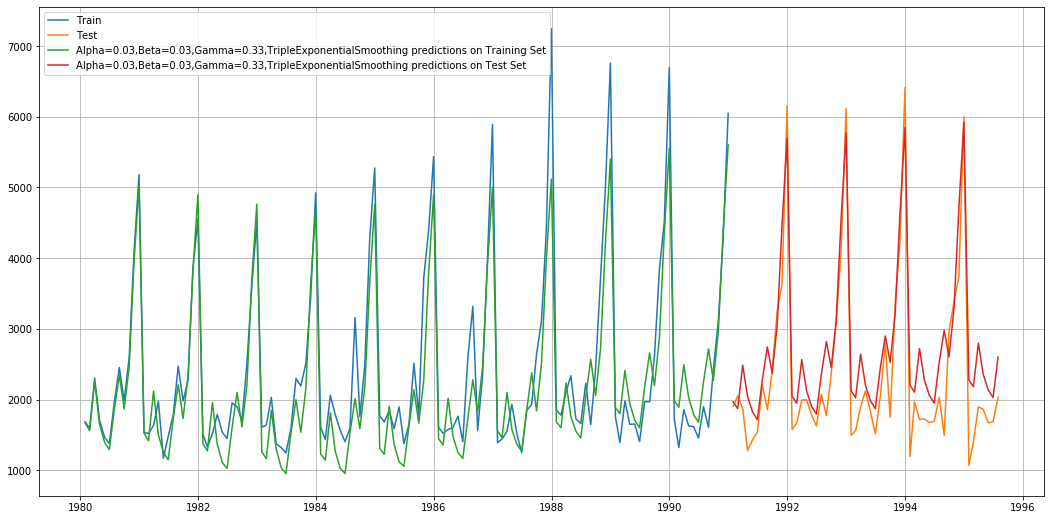

In [129]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_train['predict', 0.03, 0.03, 0.03], label='Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.03, 0.03, 0.03], label='Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [130]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][3]],'Test MAPE':[resultsDf_8_2['Test MAPE'][3]]}
                           ,index=['Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",1275.081823,38.90
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",3851.171500,152.07
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",362.791906,12.08


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Stationarity Check

In [182]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(14,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

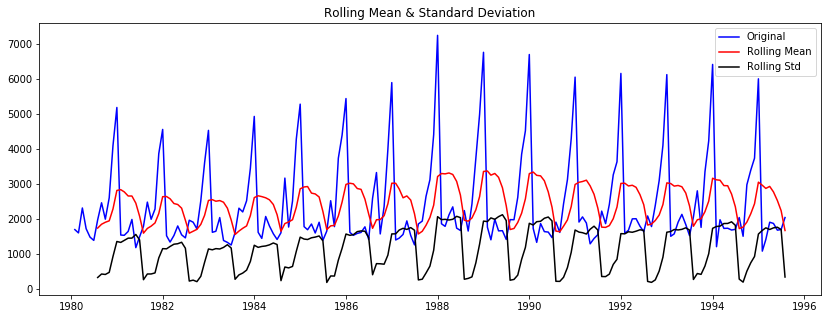

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [132]:
test_stationarity(df['Sparkling'])

In [133]:
#We see that at 5% significant level the Time Series is non-stationary.

#Let us take a difference of order 1 and check whether the Time Series is stationary or not.

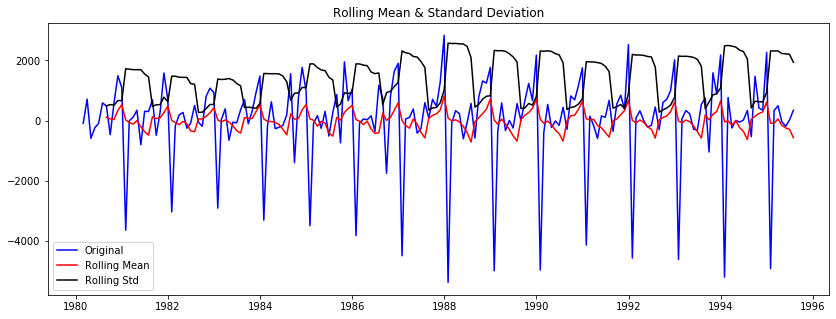

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [134]:
test_stationarity(df['Sparkling'].diff().dropna())

In [135]:
#We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [146]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

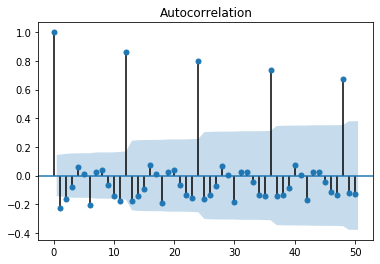

In [147]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50)
plt.show()

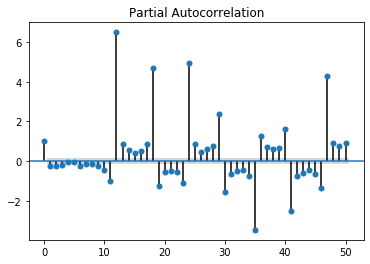

In [148]:
plot_pacf(df['Sparkling'].diff().dropna(),lags=50)
plt.show()

#### Check for stationarity of the Training Data Time Series.

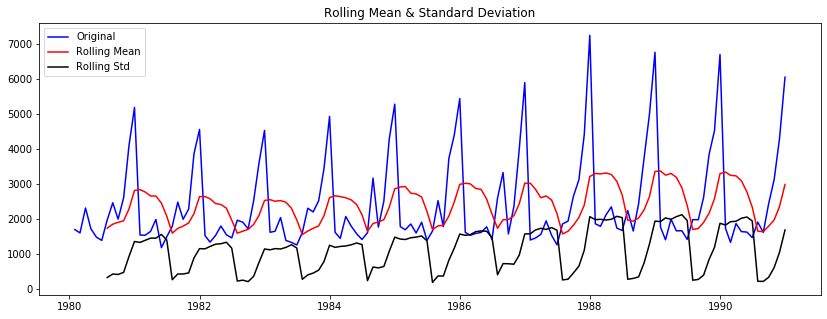

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [139]:
test_stationarity(train['Sparkling'])

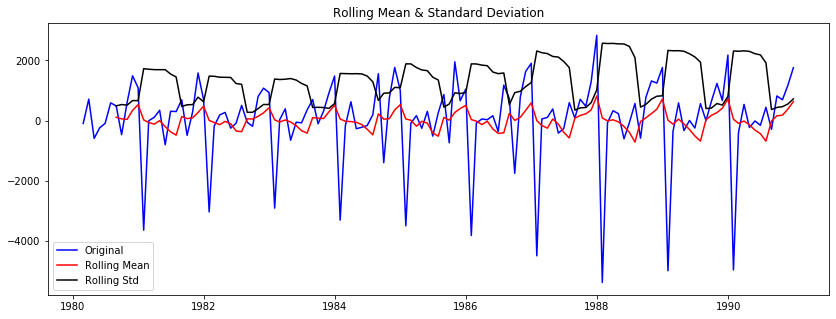

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [140]:
test_stationarity(train['Sparkling'].diff().dropna())

#### We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there

#### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [141]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [142]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [144]:
from statsmodels.tsa.arima_model import ARIMA

In [320]:
for param in pdq:
    try:
        ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
        print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
        ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    except:
        continue

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437115225
ARIMA(0, 1, 2) - AIC:2232.783097684332
ARIMA(0, 1, 3) - AIC:2233.0166051372444
ARIMA(0, 1, 4) - AIC:2233.801718140977
ARIMA(1, 1, 0) - AIC:2268.5280605942976
ARIMA(1, 1, 1) - AIC:2235.013945351675
ARIMA(1, 1, 2) - AIC:2233.5976471190743
ARIMA(1, 1, 3) - AIC:2234.57414154686
ARIMA(2, 1, 0) - AIC:2262.0356001096925
ARIMA(2, 1, 1) - AIC:2232.3604898897147


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 1, 2) - AIC:2210.6176473763135
ARIMA(2, 1, 3) - AIC:2227.5588621788816


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


ARIMA(3, 1, 0) - AIC:2259.4715548721306
ARIMA(3, 1, 1) - AIC:2233.9217587945946
ARIMA(3, 1, 2) - AIC:2228.927329370416


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 1, 3) - AIC:2225.6615585259265


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 1, 4) - AIC:2226.054855756221
ARIMA(4, 1, 0) - AIC:2261.468154737238
ARIMA(4, 1, 1) - AIC:2235.131466031873


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2) - AIC:2254.1856827620245
ARIMA(4, 1, 3) - AIC:2226.9545542523033


In [321]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 2)",2210.617647
16,"(3, 1, 3)",2225.661559
17,"(3, 1, 4)",2226.054856
21,"(4, 1, 3)",2226.954554
12,"(2, 1, 3)",2227.558862
15,"(3, 1, 2)",2228.927329
10,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
3,"(0, 1, 3)",2233.016605
7,"(1, 1, 2)",2233.597647


In [145]:
mod = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.410
Date:                Fri, 24 Jul 2020   AIC                           2210.618
Time:                        11:13:54   BIC                           2227.869
Sample:                    02-29-1980   HQIC                          2217.628
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5858      0.516     10.819      0.000       4.574       6.598
ar.L1.D.Sparkling     1.2700      0.074     17.047      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


### Predict on the Test Set using this model and evaluate the model.

In [146]:
predicted_arima = results_Arima.forecast(steps=len(test))

In [147]:
test_rmse_arima = mean_squared_error(test['Sparkling'],predicted_arima[0],squared=False)
test_mape_arima= MAPE(test['Sparkling'],predicted_arima[0])
print("Test rmse for arima is ",test_rmse_arima)
print("Test mape for arima is ",test_mape_arima)

Test rmse for arima is  1374.786712941422
Test mape for arima is  48.38


In [148]:
resultsDf_9 = pd.DataFrame({'Test RMSE': test_rmse_arima,'Test MAPE':test_mape_arima}
                           ,index=['Arima 2,1,2'])
resultsDf_9


,Test RMSE,Test MAPE
"Arima 2,1,2",1374.786713,48.38


In [149]:
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",1275.081823,38.90
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",3851.171500,152.07
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",362.791906,12.08


#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [173]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [174]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [175]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        except:
            continue

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616845638
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640238588
SARIMA(0, 1, 0)x(0, 0, 3, 12)7 - AIC:7366.666676537632
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389376
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791742


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(1, 0, 3, 12)7 - AIC:3170.4018284489616
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.205415861309
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920822
SARIMA(0, 1, 0)x(2, 0, 3, 12)7 - AIC:6603.902918943195
SARIMA(0, 1, 0)x(3, 0, 0, 12)7 - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12)7 - AIC:1469.1871052625852
SARIMA(0, 1, 0)x(3, 0, 2, 12)7 - AIC:1471.05945300665
SARIMA(0, 1, 0)x(3, 0, 3, 12)7 - AIC:3024.019878176616
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.1629078505857
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566387
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.708957286202
SARIMA(0, 1, 1)x(0, 0, 3, 12)7 - AIC:7291.4260525038
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881838439
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.0903193773431
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1509144419695


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 3, 12)7 - AIC:3263.55035075475
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954177505
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245095300011
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.401882349495
SARIMA(0, 1, 1)x(2, 0, 3, 12)7 - AIC:6850.205116264252
SARIMA(0, 1, 1)x(3, 0, 0, 12)7 - AIC:1428.4607679623582
SARIMA(0, 1, 1)x(3, 0, 1, 12)7 - AIC:1428.8727990602167
SARIMA(0, 1, 1)x(3, 0, 2, 12)7 - AIC:1429.5891926174443


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(3, 0, 3, 12)7 - AIC:2637.1731220884044
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:2187.441010168715
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:1887.9128007201286
SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:1659.878989100836
SARIMA(0, 1, 2)x(0, 0, 3, 12)7 - AIC:7212.636626909577
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:1790.0326332308127
SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:1724.167507078052
SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:1557.1605068607357
SARIMA(0, 1, 2)x(1, 0, 3, 12)7 - AIC:3588.0251882414336
SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:1603.9654774379253
SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:1600.5438799870506
SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:1557.1215626849962
SARIMA(0, 1, 2)x(2, 0, 3, 12)7 - AIC:7050.476329661217
SARIMA(0, 1, 2)x(3, 0, 0, 12)7 - AIC:1428.5993463747204
SARIMA(0, 1, 2)x(3, 0, 1, 12)7 - AIC:1429.7448383028907
SARIMA(0, 1, 2)x(3, 0, 2, 12)7 - AIC:1430.688384721184


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(3, 0, 3, 12)7 - AIC:3249.7083877165005
SARIMA(0, 1, 3)x(0, 0, 0, 12)7 - AIC:2168.0925408442645
SARIMA(0, 1, 3)x(0, 0, 1, 12)7 - AIC:1873.977069745107
SARIMA(0, 1, 3)x(0, 0, 2, 12)7 - AIC:1643.2973662045526
SARIMA(0, 1, 3)x(0, 0, 3, 12)7 - AIC:8008.426206934893
SARIMA(0, 1, 3)x(1, 0, 0, 12)7 - AIC:1792.0303418168974
SARIMA(0, 1, 3)x(1, 0, 1, 12)7 - AIC:1710.6404081041146
SARIMA(0, 1, 3)x(1, 0, 2, 12)7 - AIC:1542.7418997813925
SARIMA(0, 1, 3)x(1, 0, 3, 12)7 - AIC:9430.76419708254
SARIMA(0, 1, 3)x(2, 0, 0, 12)7 - AIC:1604.5715807617898
SARIMA(0, 1, 3)x(2, 0, 1, 12)7 - AIC:1601.0674815309515
SARIMA(0, 1, 3)x(2, 0, 2, 12)7 - AIC:1543.0486381404917
SARIMA(0, 1, 3)x(2, 0, 3, 12)7 - AIC:6932.262363717728
SARIMA(0, 1, 3)x(3, 0, 0, 12)7 - AIC:1429.6529446289135
SARIMA(0, 1, 3)x(3, 0, 1, 12)7 - AIC:1441.1435175563822
SARIMA(0, 1, 3)x(3, 0, 2, 12)7 - AIC:1431.1544827583066


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(3, 0, 3, 12)7 - AIC:2149.013246256462
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:1954.393833990475
SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:1721.2688476355372
SARIMA(1, 1, 0)x(0, 0, 3, 12)7 - AIC:7370.610237460842
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:1811.2440279330344
SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:1788.5343592678848
SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:1616.4894404973431


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(1, 0, 3, 12)7 - AIC:3481.5846937719966
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:1621.6355080129129
SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:1617.1356132107712
SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:1616.5412067514503
SARIMA(1, 1, 0)x(2, 0, 3, 12)7 - AIC:6924.4454740637775
SARIMA(1, 1, 0)x(3, 0, 0, 12)7 - AIC:1440.5134640361662
SARIMA(1, 1, 0)x(3, 0, 1, 12)7 - AIC:1442.1719780443088
SARIMA(1, 1, 0)x(3, 0, 2, 12)7 - AIC:1443.766039283778


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(3, 0, 3, 12)7 - AIC:2833.7246969545504
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:2204.9340491545663
SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:1907.3558974126247
SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:1678.0981352620317
SARIMA(1, 1, 1)x(0, 0, 3, 12)7 - AIC:7288.443132422705
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:1775.1424478024594
SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:1739.544925062429
SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:1571.3248863528565


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(1, 0, 3, 12)7 - AIC:6782.405464498179
SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:1590.6161606873197
SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:1586.3142234789561
SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:1571.8069970537151
SARIMA(1, 1, 1)x(2, 0, 3, 12)7 - AIC:7101.625194777925
SARIMA(1, 1, 1)x(3, 0, 0, 12)7 - AIC:1414.9112074297682
SARIMA(1, 1, 1)x(3, 0, 1, 12)7 - AIC:1415.9502479144116
SARIMA(1, 1, 1)x(3, 0, 2, 12)7 - AIC:1417.0903501485184


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(3, 0, 3, 12)7 - AIC:2688.3871110572095
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:2188.4633450503966
SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:1889.7708307496468
SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:1659.6291421759486
SARIMA(1, 1, 2)x(0, 0, 3, 12)7 - AIC:7214.6215835327985
SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:1771.8259799640057
SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:1723.987179893407
SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:1555.5842470091523


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 3, 12)7 - AIC:4147.087968022542
SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:1588.4216933305888
SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:1585.510160435047
SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:1556.0767705363062
SARIMA(1, 1, 2)x(2, 0, 3, 12)7 - AIC:7146.625107093116
SARIMA(1, 1, 2)x(3, 0, 0, 12)7 - AIC:1413.8096400558254
SARIMA(1, 1, 2)x(3, 0, 1, 12)7 - AIC:1414.914697003093
SARIMA(1, 1, 2)x(3, 0, 2, 12)7 - AIC:1415.9690414597849


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(3, 0, 3, 12)7 - AIC:3495.317667198326
SARIMA(1, 1, 3)x(0, 0, 0, 12)7 - AIC:2171.026403977731
SARIMA(1, 1, 3)x(0, 0, 1, 12)7 - AIC:1869.9381465357096
SARIMA(1, 1, 3)x(0, 0, 2, 12)7 - AIC:1646.5176683830268
SARIMA(1, 1, 3)x(0, 0, 3, 12)7 - AIC:7128.832750512462
SARIMA(1, 1, 3)x(1, 0, 0, 12)7 - AIC:1772.392159833919
SARIMA(1, 1, 3)x(1, 0, 1, 12)7 - AIC:1711.9554900396722
SARIMA(1, 1, 3)x(1, 0, 2, 12)7 - AIC:1542.5744650854645


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(1, 0, 3, 12)7 - AIC:2777.7274101484013
SARIMA(1, 1, 3)x(2, 0, 0, 12)7 - AIC:1590.4154052543422
SARIMA(1, 1, 3)x(2, 0, 1, 12)7 - AIC:1588.7071194997184
SARIMA(1, 1, 3)x(2, 0, 2, 12)7 - AIC:1543.1711497466622
SARIMA(1, 1, 3)x(2, 0, 3, 12)7 - AIC:6697.302447494677
SARIMA(1, 1, 3)x(3, 0, 0, 12)7 - AIC:1415.7723331852621
SARIMA(1, 1, 3)x(3, 0, 1, 12)7 - AIC:1416.7509701887454
SARIMA(1, 1, 3)x(3, 0, 2, 12)7 - AIC:1417.764919795353


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(3, 0, 3, 12)7 - AIC:2501.134567288155
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:1946.4383435411748
SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:1711.412303983535
SARIMA(2, 1, 0)x(0, 0, 3, 12)7 - AIC:7366.674334488282
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:1780.7646066053217
SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:1756.9357347830432
SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:1600.970220448109
SARIMA(2, 1, 0)x(1, 0, 3, 12)7 - AIC:3679.9583922386146
SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:1592.2403464858617
SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:1587.6344987484952
SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:1585.9191731701335


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 3, 12)7 - AIC:6916.656379654624
SARIMA(2, 1, 0)x(3, 0, 0, 12)7 - AIC:1411.9449728032132
SARIMA(2, 1, 0)x(3, 0, 1, 12)7 - AIC:1413.101761901285
SARIMA(2, 1, 0)x(3, 0, 2, 12)7 - AIC:1414.1975662921238


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(3, 0, 3, 12)7 - AIC:2485.339683848459
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:2199.858613145632
SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:1905.0209495439822
SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:1675.4234080334497
SARIMA(2, 1, 1)x(0, 0, 3, 12)7 - AIC:7288.768041483707
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:1792.8234289905215
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:1740.0911247057754
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:1571.988827921354
SARIMA(2, 1, 1)x(1, 0, 3, 12)7 - AIC:3396.645907165473
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:1577.123506089681
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:1573.1595848658199
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:1572.3428681888954
SARIMA(2, 1, 1)x(2, 0, 3, 12)7 - AIC:7157.831322626708
SARIMA(2, 1, 1)x(3, 0, 0, 12)7 - AIC:1402.4673340446247
SARIMA(2, 1, 1)x(3, 0, 1, 12)7 - AIC:1403.1307567361926
SARIMA(2, 1, 1)x(3, 0, 2, 12)7 - AIC:1403.8241633585342


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(3, 0, 3, 12)7 - AIC:2474.729777319127
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:2176.868114915305
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:1892.2372640176598
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:1661.5523432392195
SARIMA(2, 1, 2)x(0, 0, 3, 12)7 - AIC:7216.344628615869
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1757.2140932497
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1725.6005728109985
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:1557.3404041799117


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 3, 12)7 - AIC:3017.0516454710114
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:1599.3524157640218
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:1573.547600511475
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:1557.6893217689922


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 3, 12)7 - AIC:6778.079847143994
SARIMA(2, 1, 2)x(3, 0, 0, 12)7 - AIC:1401.4376140200354
SARIMA(2, 1, 2)x(3, 0, 1, 12)7 - AIC:1402.5040278684005
SARIMA(2, 1, 2)x(3, 0, 2, 12)7 - AIC:1403.4358921978699


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(3, 0, 3, 12)7 - AIC:2765.753452820393
SARIMA(2, 1, 3)x(0, 0, 0, 12)7 - AIC:2171.0395882782
SARIMA(2, 1, 3)x(0, 0, 1, 12)7 - AIC:1865.057328126372
SARIMA(2, 1, 3)x(0, 0, 2, 12)7 - AIC:1646.7076511014036
SARIMA(2, 1, 3)x(0, 0, 3, 12)7 - AIC:7490.110152485024
SARIMA(2, 1, 3)x(1, 0, 0, 12)7 - AIC:1757.8358704999682
SARIMA(2, 1, 3)x(1, 0, 1, 12)7 - AIC:1710.8242030423112
SARIMA(2, 1, 3)x(1, 0, 2, 12)7 - AIC:1543.9173470104486


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(1, 0, 3, 12)7 - AIC:3458.6304180086418
SARIMA(2, 1, 3)x(2, 0, 0, 12)7 - AIC:1577.6922467786205
SARIMA(2, 1, 3)x(2, 0, 1, 12)7 - AIC:1575.6340822580187
SARIMA(2, 1, 3)x(2, 0, 2, 12)7 - AIC:1543.9471513884985
SARIMA(2, 1, 3)x(2, 0, 3, 12)7 - AIC:6698.405395018078
SARIMA(2, 1, 3)x(3, 0, 0, 12)7 - AIC:1402.9426629610211
SARIMA(2, 1, 3)x(3, 0, 1, 12)7 - AIC:1400.376679175652
SARIMA(2, 1, 3)x(3, 0, 2, 12)7 - AIC:1401.2950773751043


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(3, 0, 3, 12)7 - AIC:2937.6045096565995
SARIMA(3, 1, 0)x(0, 0, 0, 12)7 - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12)7 - AIC:1946.3686291419165
SARIMA(3, 1, 0)x(0, 0, 2, 12)7 - AIC:1709.5089923150233
SARIMA(3, 1, 0)x(0, 0, 3, 12)7 - AIC:7366.23947089787
SARIMA(3, 1, 0)x(1, 0, 0, 12)7 - AIC:1762.7961104702936
SARIMA(3, 1, 0)x(1, 0, 1, 12)7 - AIC:1740.3783834182577
SARIMA(3, 1, 0)x(1, 0, 2, 12)7 - AIC:1600.0471968190259
SARIMA(3, 1, 0)x(1, 0, 3, 12)7 - AIC:3696.0315462553444
SARIMA(3, 1, 0)x(2, 0, 0, 12)7 - AIC:1578.2748025566298
SARIMA(3, 1, 0)x(2, 0, 1, 12)7 - AIC:1572.9330812700732
SARIMA(3, 1, 0)x(2, 0, 2, 12)7 - AIC:1571.68081993133
SARIMA(3, 1, 0)x(2, 0, 3, 12)7 - AIC:6920.161945540435
SARIMA(3, 1, 0)x(3, 0, 0, 12)7 - AIC:1396.8678620499736
SARIMA(3, 1, 0)x(3, 0, 1, 12)7 - AIC:1397.6774710673542
SARIMA(3, 1, 0)x(3, 0, 2, 12)7 - AIC:1398.3074745846523


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(3, 0, 3, 12)7 - AIC:2807.0610866884276
SARIMA(3, 1, 1)x(0, 0, 0, 12)7 - AIC:2188.2220983344714
SARIMA(3, 1, 1)x(0, 0, 1, 12)7 - AIC:1906.96906959381
SARIMA(3, 1, 1)x(0, 0, 2, 12)7 - AIC:1677.4234050478362
SARIMA(3, 1, 1)x(0, 0, 3, 12)7 - AIC:7290.646809182387
SARIMA(3, 1, 1)x(1, 0, 0, 12)7 - AIC:1746.222251904954
SARIMA(3, 1, 1)x(1, 0, 1, 12)7 - AIC:1727.308504683748
SARIMA(3, 1, 1)x(1, 0, 2, 12)7 - AIC:1573.684509592431


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(1, 0, 3, 12)7 - AIC:2970.6022712025683
SARIMA(3, 1, 1)x(2, 0, 0, 12)7 - AIC:1564.9377505381285
SARIMA(3, 1, 1)x(2, 0, 1, 12)7 - AIC:1576.2956634960115
SARIMA(3, 1, 1)x(2, 0, 2, 12)7 - AIC:1576.3498133352018
SARIMA(3, 1, 1)x(2, 0, 3, 12)7 - AIC:6849.549128485657
SARIMA(3, 1, 1)x(3, 0, 0, 12)7 - AIC:1387.7883315562137
SARIMA(3, 1, 1)x(3, 0, 1, 12)7 - AIC:1388.6814838578387
SARIMA(3, 1, 1)x(3, 0, 2, 12)7 - AIC:1389.195898204901
SARIMA(3, 1, 1)x(3, 0, 3, 12)7 - AIC:2967.976900558733
SARIMA(3, 1, 2)x(0, 0, 0, 12)7 - AIC:2187.314727182382
SARIMA(3, 1, 2)x(0, 0, 1, 12)7 - AIC:1887.780425531722
SARIMA(3, 1, 2)x(0, 0, 2, 12)7 - AIC:1659.6255036506711
SARIMA(3, 1, 2)x(0, 0, 3, 12)7 - AIC:7538.570041909392
SARIMA(3, 1, 2)x(1, 0, 0, 12)7 - AIC:1744.9635869536767
SARIMA(3, 1, 2)x(1, 0, 1, 12)7 - AIC:1727.3650436460332
SARIMA(3, 1, 2)x(1, 0, 2, 12)7 - AIC:1559.436416568194
SARIMA(3, 1, 2)x(1, 0, 3, 12)7 - AIC:3567.199386267144
SARIMA(3, 1, 2)x(2, 0, 0, 12)7 - AIC:1564.2926932782548


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(3, 0, 3, 12)7 - AIC:2757.3960485891134
SARIMA(3, 1, 3)x(0, 0, 0, 12)7 - AIC:2155.7749542046868
SARIMA(3, 1, 3)x(0, 0, 1, 12)7 - AIC:1864.9108463379885
SARIMA(3, 1, 3)x(0, 0, 2, 12)7 - AIC:1643.783038878723
SARIMA(3, 1, 3)x(0, 0, 3, 12)7 - AIC:7126.7913644136315
SARIMA(3, 1, 3)x(1, 0, 0, 12)7 - AIC:1749.2988260339189
SARIMA(3, 1, 3)x(1, 0, 1, 12)7 - AIC:1851.5285999260564
SARIMA(3, 1, 3)x(1, 0, 2, 12)7 - AIC:1544.3825443849285
SARIMA(3, 1, 3)x(1, 0, 3, 12)7 - AIC:7088.336488242879
SARIMA(3, 1, 3)x(2, 0, 0, 12)7 - AIC:1569.1444446348755
SARIMA(3, 1, 3)x(2, 0, 1, 12)7 - AIC:1561.9119159444624
SARIMA(3, 1, 3)x(2, 0, 2, 12)7 - AIC:1545.7744584477416
SARIMA(3, 1, 3)x(2, 0, 3, 12)7 - AIC:6694.605322091825
SARIMA(3, 1, 3)x(3, 0, 0, 12)7 - AIC:1387.4970368130134
SARIMA(3, 1, 3)x(3, 0, 1, 12)7 - AIC:1394.043025889016
SARIMA(3, 1, 3)x(3, 0, 2, 12)7 - AIC:1392.6352597766042


C:\Users\RIKKI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(3, 0, 3, 12)7 - AIC:2679.081967283049


In [176]:
SARIMA_AIC.sort_values(by=['AIC']).head()  

,param,seasonal,AIC
252,"(3, 1, 3)","(3, 0, 0, 12)",1387.497037
220,"(3, 1, 1)","(3, 0, 0, 12)",1387.788332
237,"(3, 1, 2)","(3, 0, 1, 12)",1388.602328
221,"(3, 1, 1)","(3, 0, 1, 12)",1388.681484
222,"(3, 1, 1)","(3, 0, 2, 12)",1389.195898


In [177]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, 0, 12)   Log Likelihood                -683.749
Date:                            Fri, 24 Jul 2020   AIC                           1387.497
Time:                                    12:43:55   BIC                           1412.715
Sample:                                         0   HQIC                          1397.675
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6749      0.142    -11.820      0.000      -1.953      -1.397
ar.L2         -0.7442      0.258   

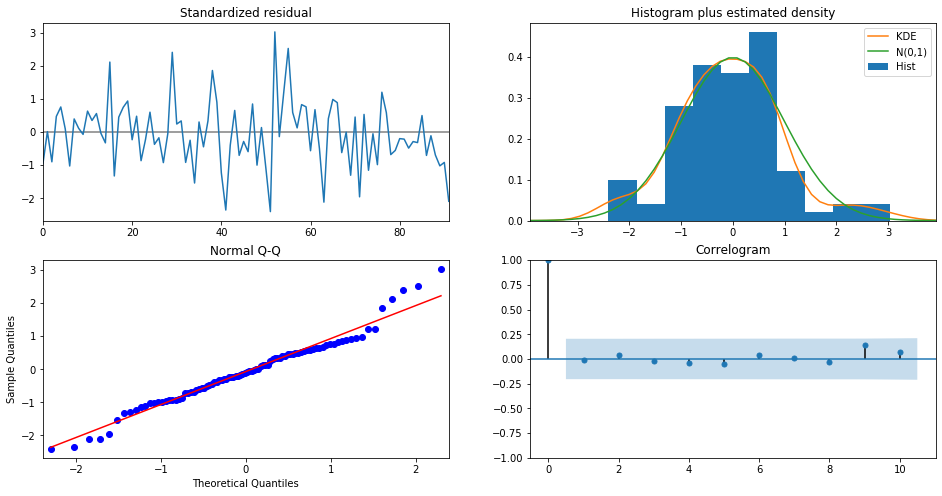

In [178]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [179]:
pred_test_SARIMA = results_SARIMA.get_forecast(steps=len(test))
pred_test_SARIMA.predicted_mean

array([1342.25402323, 1350.73764392, 1578.37723704, 1667.74178595,
       1320.60044528, 1293.84951791, 1729.25631609, 1483.07473479,
       2266.92449373, 3285.6120096 , 4423.29915592, 6350.94002913,
       1309.38401811, 1067.08626197, 1525.523015  , 1387.58028936,
       1235.38250866, 1089.34081579, 1601.02585   , 1372.50604952,
       2180.29044362, 3208.0513297 , 4300.29377959, 6342.63450073,
       1150.36601013,  934.13712994, 1364.18159603, 1266.56644223,
       1079.88165245,  961.78890229, 1457.42968068, 1199.89497736,
       2042.42346967, 3040.94485874, 4219.11786277, 6266.02411847,
        969.14126857,  787.86431233, 1199.97107403, 1130.06028119,
        905.97139137,  795.16151841, 1306.70926271, 1046.32135678,
       1908.34816275, 2970.15711594, 4174.71859197, 6295.55348546,
        820.1740435 ,  605.38516123, 1054.41735661,  957.06245977,
        749.10974996,  622.33358368, 1155.3316074 ])

In [181]:
test_rmse_sarima = mean_squared_error(test['Sparkling'],pred_test_SARIMA.predicted_mean,squared=False)
test_mape_sarima= MAPE(test['Sparkling'],pred_test_SARIMA.predicted_mean)
print("Test rmse for sarima is ",test_rmse_sarima)
print("Test mape for sarima is ",test_mape_sarima)

Test rmse for sarima is  611.3821008276614
Test mape for sarima is  21.83


In [182]:
resultsDf_10 = pd.DataFrame({'Test RMSE': test_rmse_sarima,'Test MAPE':test_mape_sarima}
                           ,index=['SARIMA(3, 1, 3)(3, 0, 0, 12)'])
resultsDf_10

,Test RMSE,Test MAPE
"SARIMA(3, 1, 3)(3, 0, 0, 12)",611.382101,21.83


In [184]:
resultsDf = pd.concat([resultsDf,resultsDf_10])

resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",1275.081823,38.90
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",3851.171500,152.07
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",362.791906,12.08


In [ ]:
SARIMA(1, 1, 2)(1, 0, 2, 12)

### ARIMA/SARIMA models based on the cut-off points of ACF and PACF 

In [185]:
import statsmodels.api as sm

mod_sar = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_new = mod_sar.fit(maxiter=1000)
print(results_SARIMA_new.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Fri, 24 Jul 2020   AIC                           1555.584
Time:                                    12:52:21   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

In [186]:
pred_test_SARIMA_new = results_SARIMA_new.get_forecast(steps=len(test))
pred_test_SARIMA_new.predicted_mean

array([1327.39146326, 1315.12028535, 1621.58834791, 1598.87456871,
       1392.693212  , 1224.82381758, 1780.44162076, 1787.84529325,
       2192.54795865, 3184.33916408, 4490.64374633, 6525.05349506,
       1307.25721964, 1172.76516715, 1572.14878724, 1504.44211611,
       1306.8052792 , 1095.96107183, 1716.99535624, 1784.54376341,
       2126.35737085, 3224.70658927, 4587.09115953, 6765.74527421,
       1251.55107536, 1074.67382028, 1514.50126552, 1429.42672339,
       1232.16105264, 1006.38352177, 1658.23858071, 1726.5092802 ,
       2084.73050539, 3230.39241335, 4653.11635288, 6927.02424928,
       1171.07755822,  986.30088526, 1445.51520865, 1356.65309712,
       1150.76523693,  915.05877046, 1595.53176218, 1666.78982581,
       2040.735697  , 3236.66776777, 4721.82524023, 7095.514586  ,
       1086.98844415,  894.10295087, 1373.46867051, 1280.70694011,
       1065.78451553,  819.73478592, 1530.06808735])

In [187]:
test_rmse_sarima_new = mean_squared_error(test['Sparkling'],pred_test_SARIMA_new.predicted_mean,squared=False)
test_mape_sarima_new= MAPE(test['Sparkling'],pred_test_SARIMA_new.predicted_mean)
print("Test rmse for sarima is ",test_rmse_sarima_new)
print("Test mape for sarima is ",test_mape_sarima_new)

Test rmse for sarima is  528.608624464942
Test mape for sarima is  18.89


In [188]:
resultsDf_11 = pd.DataFrame({'Test RMSE': test_rmse_sarima_new,'Test MAPE':test_mape_sarima_new}
                           ,index=['SARIMA(1, 1, 2)(1, 0, 2, 12)'])
resultsDf_11

,Test RMSE,Test MAPE
"SARIMA(1, 1, 2)(1, 0, 2, 12)",528.608624,18.89


In [189]:
resultsDf = pd.concat([resultsDf,resultsDf_11])

resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=1,SimpleExponentialSmoothing",1275.081823,38.90
"Alpha=0.647,Beta=0,DoubleExponentialSmoothing",3851.171500,152.07
"Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponentialSmoothing",362.791906,12.08


In [ ]:
#Arima

In [190]:
mod_new = ARIMA(train['Sparkling'], order=(1,1,2),freq='M')

results_Arima_new = mod_new.fit()

print(results_Arima_new.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1111.799
Method:                       css-mle   S.D. of innovations           1155.290
Date:                Fri, 24 Jul 2020   AIC                           2233.598
Time:                        12:58:38   BIC                           2247.974
Sample:                    02-29-1980   HQIC                          2239.439
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.4580      4.211      1.534      0.128      -1.795      14.711
ar.L1.D.Sparkling     0.1896      0.166      1.143      0.255      -0.135       0.515
ma.L1.D.Sparkling    -0.

In [197]:
predicted_arima_new = results_Arima_new.forecast(steps=len(test))

In [198]:
predicted_arima_new[0]

array([4204.78005728, 3081.50172294, 2873.75278189, 2839.59544535,
       2838.35244817, 2843.35026972, 2849.5313998 , 2855.93689452,
       2862.38493054, 2868.84103274, 2875.29866434, 2881.75658593,
       2888.21456251, 2894.67254951, 2901.13053849, 2907.58852784,
       2914.04651727, 2920.5045067 , 2926.96249614, 2933.42048558,
       2939.87847502, 2946.33646447, 2952.79445391, 2959.25244335,
       2965.71043279, 2972.16842223, 2978.62641167, 2985.08440111,
       2991.54239055, 2998.00037999, 3004.45836943, 3010.91635887,
       3017.37434831, 3023.83233775, 3030.2903272 , 3036.74831664,
       3043.20630608, 3049.66429552, 3056.12228496, 3062.5802744 ,
       3069.03826384, 3075.49625328, 3081.95424272, 3088.41223216,
       3094.8702216 , 3101.32821104, 3107.78620048, 3114.24418992,
       3120.70217937, 3127.16016881, 3133.61815825, 3140.07614769,
       3146.53413713, 3152.99212657, 3159.45011601])

In [199]:
test_rmse_arima_new = mean_squared_error(test['Sparkling'],predicted_arima_new[0],squared=False)
test_mape_arima_new= MAPE(test['Sparkling'],predicted_arima_new[0])
print("Test rmse for arima is ",test_rmse_arima_new)
print("Test mape for arima is ",test_mape_arima_new)

Test rmse for arima is  1436.725373053049
Test mape for arima is  52.29


In [200]:
resultsDf_12 = pd.DataFrame({'Test RMSE': test_rmse_arima_new,'Test MAPE':test_mape_arima_new}
                           ,index=['ARIMA(1,1,2)'])
resultsDf_12

,Test RMSE,Test MAPE
"ARIMA(1,1,2)",1436.725373,52.29


### Best Model

In [201]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                       Test RMSE  Test MAPE
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...   317.553880       9.59
Alpha=0.0862,Beta=0,Gamma=0.4763,TripleExponent...   362.791906      12.08
SARIMA(1, 1, 2)(1, 0, 2, 12)                         528.608624      18.89
SARIMA(3, 1, 3)(3, 0, 0, 12)                         611.382101      21.83
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
SimpleAverageModel                                  1275.081804      38.90
Alpha=1,SimpleExponentialSmoothing                  1275.081823      38.90
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Arima 2,1,2                                         1374.786713      48.38
RegressionOnTime                                    1389.1

##### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.03,  𝛽  = 0.03 and  𝛾  = 0.33.

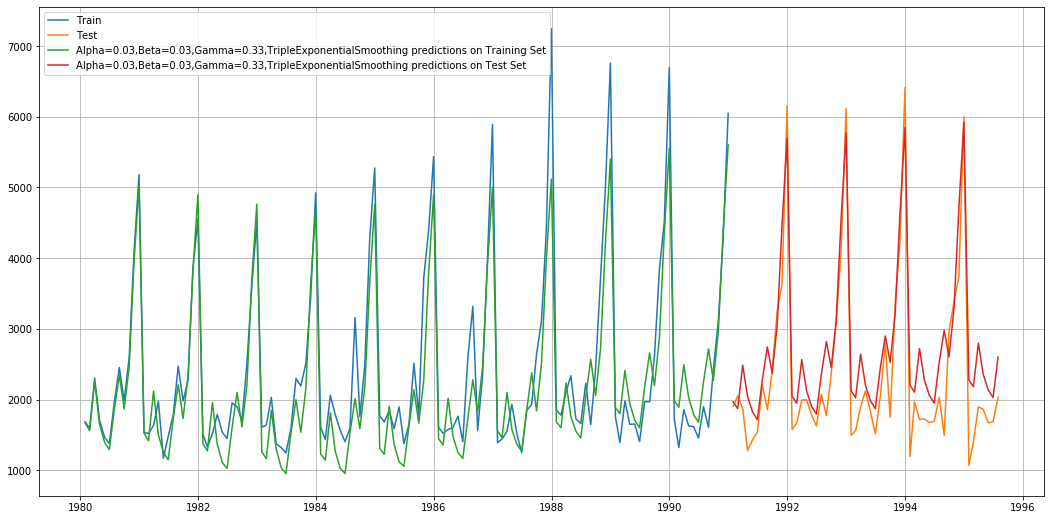

In [202]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_train['predict', 0.03, 0.03, 0.03], label='Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.03, 0.03, 0.03], label='Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [149]:
fullmodel1 = ExponentialSmoothing(df['Sparkling'].astype("double"),trend='additive',seasonal='additive',freq='M').fit(
    smoothing_level=0.03,smoothing_slope=0.03,smoothing_seasonal=0.33)


In [207]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df['Sparkling'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 364.07527593525344 
MAPE: 10.93


In [150]:
# Getting the predictions for the 12 months
prediction_1 = fullmodel1.forecast(steps=12)

In [151]:
prediction_1

1995-08-31    1938.339325
1995-09-30    2419.476018
1995-10-31    3280.986688
1995-11-30    3998.451135
1995-12-31    6164.404507
1996-01-31    1336.297290
1996-02-29    1621.452037
1996-03-31    1856.928796
1996-04-30    1826.030703
1996-05-31    1677.729872
1996-06-30    1605.037882
1996-07-31    2031.550016
Freq: M, dtype: float64

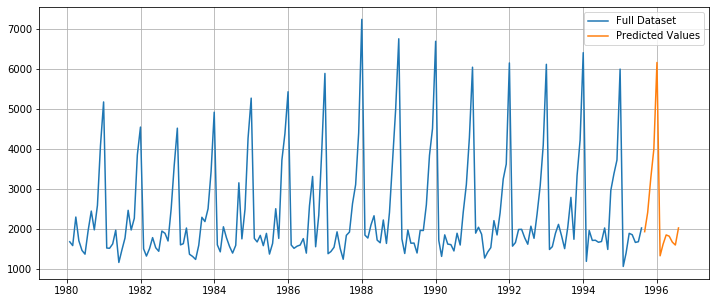

In [153]:
plt.figure(figsize=(12,5))
plt.plot(df['Sparkling'],label='Full Dataset')
plt.plot(prediction_1,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [154]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,528.138373,1938.339325,7507.106655
1995-09-30,1009.275066,2419.476018,7988.243348
1995-10-31,1870.785736,3280.986688,8849.754018
1995-11-30,2588.250183,3998.451135,9567.218465
1995-12-31,4754.203555,6164.404507,11733.171837


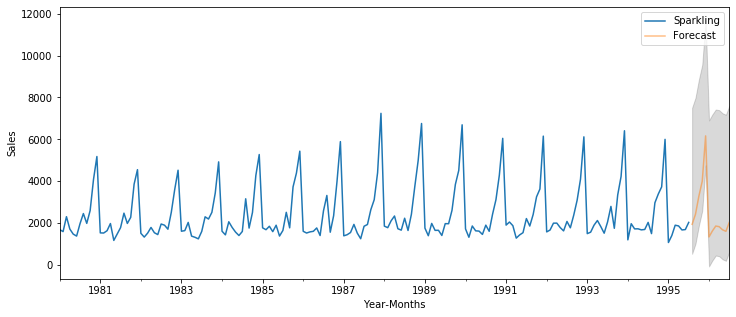

In [155]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(12,5))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

##### Triple Exponential Model is performing best in this case giving us the least error. 
##### Looking at the bar plot, we can see that on December months the sales are highest. We can use this insights to increase our sales further. 
##### We can introduce certain offers in November, December months to attaract more customers.
##### On Saturdays mean sales of the wine is highest. We can give certain offers to attract more customers.
##### Year 1988 has the highest sales recorded till data. We can go back to find out the reasons to which pushed the sales so much.
##### Looking at the prediction, we can say that the sales figure will be more or less same as that of previous year. Hence some important measures have to be taken to increase the trend. As the trend has been more or less constant through out the years.